In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
traindf = pd.read_csv('train.csv', header=None)
traindf.head()

,0,1,2,3,4,5,6,7
0,-0.890447,-1.295950,1.188030,-1.450430,1.238500,1.876070,-0.818684,-0.005574
1,0.549165,0.066917,-0.517804,0.638098,0.164716,0.227616,-0.945600,0.568593
2,0.941555,-1.292630,1.068030,1.950890,-0.085833,-1.180960,-0.385584,0.798260
3,-0.966886,1.047520,0.376289,1.831540,0.880569,-0.988829,-0.898007,0.568593
4,0.638344,0.233121,-0.364867,0.488917,0.164716,-0.011126,-0.961465,0.855677


In [3]:
xdf = traindf.iloc[:,0:7]
xdf[7] = 1
x = xdf.as_matrix()

In [4]:
ydf = traindf.iloc[:,7]
y = ydf.as_matrix()

In [5]:
def gradient(x, y, w):
    grad = []
    for j in range(len(w)):
        s = 0
        for i in range(x.shape[0]):
            s += (y[i]-w.dot(x[i]))*x[i][j]
        grad.append(-s)
    return np.array(grad)

In [6]:
def costFunction(x, y, w):
    j = 0 
    for i in range(x.shape[0]):
        j += (y[i]-w.dot(x[i]))**2
    return j / 2

In [7]:
def batchGradientDescent(x, y, r=0.1):
    w = np.zeros(x.shape[1])
    j = costFunction(x, y, w)
    js = []
    js.append(j)
    converge = False
    t = 0
    while t < 10000:
        w2 = w - r * gradient(x, y, w)
        j2 = costFunction(x, y, w2)
        if j2 > j:
            return False, w, j, js
        js.append(j2)
        if np.linalg.norm(w2-w) < 1e-6:
            return True, w2, j2, js
        w = w2
        j = j2
        t += 1
    return False, w, j, js

In [8]:
r = [1, 0.6, 0.3, 0.1, 0.06, 0.03, 0.01, 0.006, 0.003, 0.001]

In [9]:
for gamma in r:
    isConverged, weight, cost, costs = batchGradientDescent(x, y, gamma)
    if isConverged:
        print('learning rate: {}'.format(gamma))
        print('weight: {}'.format(weight))
        print('cost on training data: {}'.format(cost))
        break

learning rate: 0.01
weight: [ 0.90022499  0.78594341  0.85066508  1.29862298  0.12983393  1.5717928
  0.99834709 -0.01520362]
cost on training data: 14.981943701311598


In [10]:
np.linalg.inv(x.transpose().dot(x)).dot(x.transpose()).dot(y)

array([ 0.90056451,  0.78629331,  0.85104314,  1.29889413,  0.12989067,
        1.57224887,  0.99869359, -0.01519667])

In [11]:
testdf = pd.read_csv('test.csv', header=None)
testdf.head()

,0,1,2,3,4,5,6,7
0,1.581100,-1.295950,-1.753060,1.831540,-0.909064,0.852891,-0.771091,-0.120408
1,0.561905,0.183260,-0.400160,0.240283,0.164716,-1.420840,1.386480,0.970510
2,-1.145250,0.831454,0.176294,-0.704529,1.238500,-0.147550,0.561526,0.654718
3,-1.056070,0.183260,-0.400160,0.240283,0.164716,-0.272605,1.418210,0.568593
4,1.147940,-1.295950,0.164530,-0.455895,0.164716,-0.204393,0.577390,0.626010


In [12]:
xdf2 = testdf.iloc[:,0:7]
xdf2[7] = 1
x2 = xdf2.as_matrix()

In [13]:
ydf2 = testdf.iloc[:,7]
y2 = ydf2.as_matrix()

In [14]:
print('cost on testing data: {}'.format(costFunction(x2,y2,weight)))

cost on testing data: 23.361305269196592


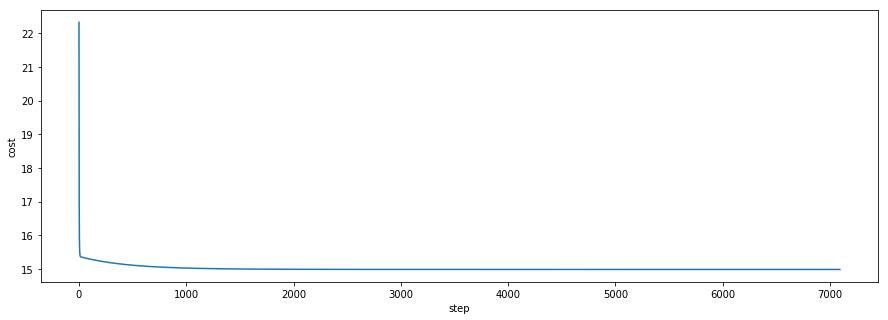

In [15]:
plt.figure(figsize=(15,5))
plt.plot(costs)
# plt.xlim([0,10])
plt.xlabel('step')
plt.ylabel('cost')
plt.show()